<a href="https://colab.research.google.com/github/jaggusuperhit/Machine-learning/blob/main/end_to_end_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [12]:
df = pd.read_csv('/content/placement.csv')

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [15]:
df.shape

(100, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
df.shape

(100, 4)

In [16]:
df = df.iloc[:,1:]

In [17]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [18]:
import matplotlib.pyplot as plt


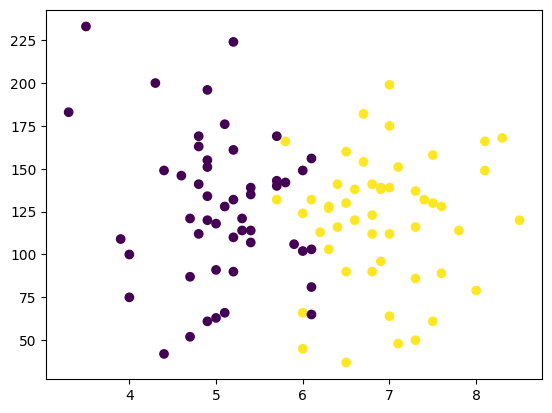

In [19]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [20]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [21]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [22]:
y.shape

(100,)

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [24]:
X_train

,cgpa,iq
7,5.0,63.0
67,5.0,118.0
72,7.3,116.0
71,6.1,132.0
5,7.1,48.0
...,...,...
29,7.0,112.0
12,5.4,139.0
16,5.2,224.0
99,6.2,113.0


In [25]:
y_train

7     0
67    0
72    1
71    1
5     1
     ..
29    1
12    0
16    0
99    1
18    0
Name: placement, Length: 90, dtype: int64

In [26]:
X_test

,cgpa,iq
70,6.3,127.0
46,5.3,114.0
93,6.8,112.0
49,5.4,135.0
75,4.8,169.0
39,4.6,146.0
62,6.0,102.0
87,5.7,132.0
0,6.8,123.0
83,7.5,130.0


In [27]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
X_train = scaler.fit_transform(X_train)

In [31]:
X_train

array([[-8.59600950e-01, -1.44799930e+00],
       [-8.59600950e-01, -1.20174821e-01],
       [ 1.11968044e+00, -1.68459348e-01],
       [ 8.70118870e-02,  2.17816864e-01],
       [ 9.47569011e-01, -1.81013325e+00],
       [-9.45656662e-01,  2.66101390e-01],
       [ 8.61513299e-01,  1.25593418e+00],
       [ 2.15234899e+00, -7.18902949e-02],
       [-2.57210963e-01,  4.10954969e-01],
       [ 1.11968044e+00,  3.38528180e-01],
       [-6.01433812e-01, -4.77480317e-02],
       [ 4.31234737e-01, -7.96158191e-01],
       [ 3.45179024e-01, -1.68459348e-01],
       [ 8.61513299e-01, -1.42385704e+00],
       [ 2.59123312e-01,  1.21247811e-01],
       [ 4.31234737e-01,  1.69532337e-01],
       [ 1.80812614e+00,  1.03865381e+00],
       [ 9.47569011e-01,  6.76519865e-01],
       [ 1.11968044e+00, -8.92727244e-01],
       [-1.46199094e+00,  1.85949076e+00],
       [-5.15378100e-01, -2.16743874e-01],
       [ 1.54995900e+00, -2.16743874e-01],
       [-1.03171237e+00,  4.35097233e-01],
       [ 8.

In [32]:
X_test = scaler.transform(X_test)

In [33]:
X_test

array([[ 2.59123312e-01,  9.71055476e-02],
       [-6.01433812e-01, -2.16743874e-01],
       [ 6.89401874e-01, -2.65028401e-01],
       [-5.15378100e-01,  2.90243653e-01],
       [-1.03171237e+00,  1.11108060e+00],
       [-1.20382380e+00,  5.55808549e-01],
       [ 9.56174582e-04, -5.06451033e-01],
       [-2.57210963e-01,  2.17816864e-01],
       [ 6.89401874e-01,  5.36494738e-04],
       [ 1.29179186e+00,  1.69532337e-01]])

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
clf = LogisticRegression()

In [37]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [38]:
y_pred = clf.predict(X_test)

In [39]:
y_test

70    1
46    0
93    1
49    0
75    0
39    0
62    0
87    1
0     1
83    1
Name: placement, dtype: int64

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_test,y_pred)

0.8

In [42]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

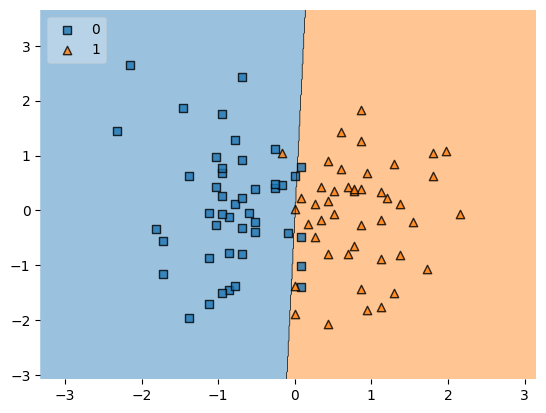

In [43]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [44]:
import pickle

In [45]:
pickle.dump(clf,open('model.pkl','wb'))